Fudhail M

IT-A 3122225002033

PRML Lab Ex8

Ensemble Learning Techniques: A Comparative Study on Machine Learning Models

Dataset used: Advertising sales dataset

Techniques/Models used: Bagging(Random Forest), Boosting(XGBoost), Stacking(meta-learner with several base models)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
url = "/Users/fudhail/Downloads/advertising.csv"
advertising = pd.read_csv(url)

In [16]:
# Convert Sales into a binary variable (e.g., high sales vs. low sales)
median_sales = advertising['Sales'].median()
advertising['High_Sales'] = (advertising['Sales'] > median_sales).astype(int)

In [17]:
# Define features and target variable
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['High_Sales']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Random Forest (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.97


In [27]:
# XGBoost (Boosting)
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

XGBoost Accuracy: 0.95


In [22]:
# Stacking Classifier
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='linear', probability=True)),
    ('dt', DecisionTreeClassifier())
]

In [23]:
final_estimator = LogisticRegression()
stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [24]:
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}")

Stacking Classifier Accuracy: 0.97


In [25]:
# Compare results
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Stacking Classifier"],
    "Accuracy": [rf_accuracy, xgb_accuracy, stacking_accuracy]
})

/var/folders/rc/h17_f8f530s_wxyxdnr30c0w0000gn/T/ipykernel_1541/4105777937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")


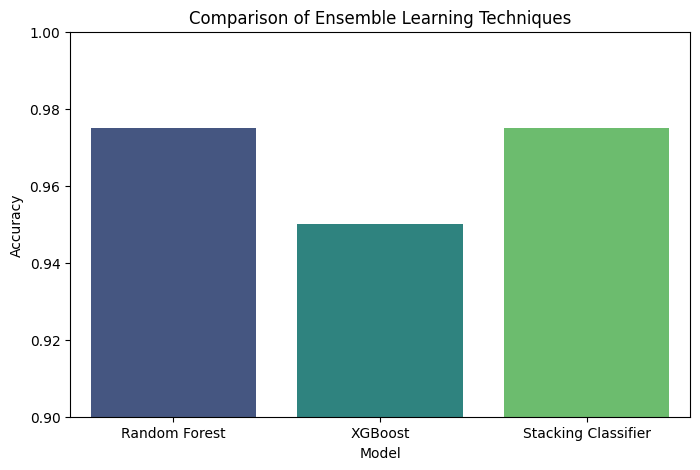

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Comparison of Ensemble Learning Techniques")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.9, 1)
plt.show()